# Prepare Data and Load Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [4]:
engagement = pd.read_csv("C:/Relax/takehome_user_engagement.csv", parse_dates=True)
users = pd.read_csv("C:/Relax/takehome_users.csv", encoding='latin-1', parse_dates=True)

In [6]:
engagement = engagement.set_index(pd.DatetimeIndex(engagement['time_stamp']))

In [7]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [8]:
engagement.head()

,time_stamp,user_id,visited
time_stamp,,,
2014-04-22 03:53:30,2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2013-12-25 03:45:04,2,1


In [10]:
#group by user ID, resample by week, and collect total vists per week
grouped = engagement.groupby('user_id').resample('1W').sum()
#remove null values
grouped = grouped[grouped['user_id'].isnull()==False].drop('user_id',axis=1)
grouped.tail(15)

visited
user_id time_stamp         
11990   2013-07-07        1
11991   2014-04-20        1
        2014-04-27        1
        2014-05-04        1
        2014-05-11        0
        2014-05-18        1
        2014-05-25        0
        2014-06-01        1
11992   2014-04-13        1
11995   2013-10-27        1
11996   2013-09-08        1
11997   2013-01-20        1
11998   2014-04-27        1
11999   2012-06-03        1
12000   2014-01-26        1

# Derived Variables (Defining 'Adopted Users')



Relax defines an "adopted user" as "a user who has logged into the product on three separate days in at least one seven-day period"

In [13]:
#tags weeks that had less than 3 visits for all users
adopted_users = grouped['visited'] >= 3

#Groups users and sums up the number of weeks that had 3 or more visits
adopted_users = adopted_users.groupby(level=0).apply(np.sum)

#Removes users with no that had 3+ visit weeks
adopted_users = adopted_users[adopted_users! = 0]
adopted_users = pd.DataFrame(adopted_users,index=adopted_users.index)
adopted_users.columns = ['Active Weeks']


,Active Weeks
user_id,
11965,1
11967,8
11969,22
11975,44
11988,6


In [15]:
adopted_users_data = active_users.merge(users,left_index=True,right_on='object_id',how='inner')
adopted_users_data.head()

,Active Weeks,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
1,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
9,52,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0
19,1,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN
32,1,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0
41,68,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN


In [17]:
#Pull info on Adopted Users 
adopted_users_data['Active'] = 1

#Add Active column to original Dataset
users['Active']=int(0)
users.iloc[list(adopted_users_data.index),10]=1
model_data = users.set_index('object_id').sort_index()

#Prep data for modeling by taking away unneeded columns
model_data = model_data.drop([ 'name', 'email','last_session_creation_time',],axis=1)
date_feature = model_data.pop('creation_time')
model_data.head

<bound method NDFrame.head of               creation_source  opted_in_to_mailing_list  \
object_id                                                 
1                GUEST_INVITE                         1   
2                  ORG_INVITE                         0   
3                  ORG_INVITE                         0   
4                GUEST_INVITE                         0   
5                GUEST_INVITE                         0   
6                GUEST_INVITE                         0   
7                      SIGNUP                         0   
8           PERSONAL_PROJECTS                         1   
9           PERSONAL_PROJECTS                         0   
10                 ORG_INVITE                         1   
11                     SIGNUP                         0   
12                 ORG_INVITE                         0   
13                 ORG_INVITE                         0   
14                     SIGNUP                         0   
15          PERSONAL_PROJE

# Exploratory Data Analysis

In [18]:
#Fill/Clean missing values, and polish non-0 values into binary format 

model_data['invited_by_user_id'] = model_data['invited_by_user_id'].fillna(0)
model_data['invited_by_user_id'] = model_data['invited_by_user_id'].apply(
        lambda x: 1 if x!=0 else 0)
model_data = pd.get_dummies(data=model_data,columns=['creation_source'])

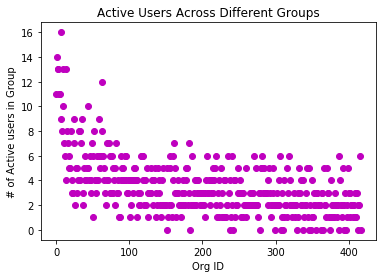

In [21]:
organizations = model_data.groupby('org_id').sum()
plt.scatter(organizations.index, organizations.Active, color='m')
plt.ylabel('# of Active users in Group')
plt.xlabel('Org ID')
plt.title("Active Users Across Different Groups")
plt.show()

# Model Testing/Analysis

Will use Gradient Boosting Classifier Model (GBM) For this analysis, because of its ability to determine partial dependence for individual variables - given the scope of the question, this seems the most appropriate.

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

y = model_data.pop('Active')
x = model_data

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3,random_state=42)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
gbm0 = GradientBoostingClassifier(max_features='sqrt')

parameter_search = {'n_estimators':[40,45,50,55,60],'learning_rate':[.01,0.02,0.03,0.04,0.05],
              'max_depth':[1,2,3,4,5]}
grid_search = GridSearchCV(estimator=gbm0,param_grid=parameter_search,
                     scoring='accuracy',cv=5)
grid_search.fit(x_train,y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Ideal Parameters :\n',best_parameters,'\nAchieved %s Percent Accuracy' %(best_accuracy*100))

Ideal Parameters :
 {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 40} 
Achieved 87.92857142857143 Percent Accuracy


In [28]:
gbm = GradientBoostingClassifier(max_features='sqrt',
                                 n_estimators=50,learning_rate=.05,max_depth= 3)
gbm.fit(x_train,y_train)
feature_scores = pd.DataFrame(gbm.feature_importances_).transpose()
feature_scores.columns = list(model_data.columns)
feature_scores.index = ['GBM'] 
feature_scores.transpose().sort_values(by='GBM',ascending=False)

,GBM
org_id,0.517337
creation_source_PERSONAL_PROJECTS,0.214534
creation_source_GUEST_INVITE,0.068349
opted_in_to_mailing_list,0.051325
enabled_for_marketing_drip,0.040075
creation_source_SIGNUP_GOOGLE_AUTH,0.037344
creation_source_ORG_INVITE,0.028826
creation_source_SIGNUP,0.027601
invited_by_user_id,0.014608
